In [1]:
# imports necessary packages in order to 
import spacy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import gensim
from gensim import corpora
from gensim.models import LdaModel
import re

In [3]:
# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df

df = pd.read_json(data_url, lines=True)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [5]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [6]:
# tokenizes the text and returns a list of tokens
def tokenize(doc):

    tokens = []
    doc = nlp(doc)
    for token in doc:
      if not token.is_stop and not token.is_punct:
        tokens.append(token.lemma_.lower())
    return tokens


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [8]:
%%time
# creates a vector representation of the reviews 
vectorizer = TfidfVectorizer(tokenizer=tokenize)
dtm = vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 2min 52s, sys: 360 ms, total: 2min 52s
Wall time: 2min 57s


In [9]:
# Creates and fits a NearestNeighbors model named "nn"

nn = NearestNeighbors(n_neighbors=10)
nn.fit(dtm)


NearestNeighbors(n_neighbors=10)

In [11]:
# Creates a fake review and querys for the 10 most similar reviews

fake_review = "This restaurant has amazing food and excellent service"
fake_review_vector = vectorizer.transform([fake_review])
_, indices = nn.kneighbors(fake_review_vector)

for index in indices[0]:
  print(df['text'][index])

Very yummy! Food and service were excellent!
This place has excellent service and they work as a team! Food was excellent. Highly recommend!
what a sweet little coffee shop. Only been  open a few months. The people are super nice the coffee is excellent excellent excellent excellent excellent and who could ask for anything more.
Excellent service! Excellent food! Kevin is a great server with excellent customer service skills. He engages the guests and keeps us coming back.
Second time here...excellent food...wings were amazing!

James did an excellent job as our server....

Definitely will come back...
Amazing food! Amazing service! Tons of fun! Come here if you want to have a great night!
Excellent place!, excellent service, good food, expect to pay about 20.00 for a burger but its an experience and its vegas!!
The food here is amazing!, why isn't this place booming?  I don't understand - the service is amazing and the food is super tasty
Just amazing , the food was very good. The che

In [13]:
# import necessary packages to create a prediction model 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df['text']
y = df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_subset = X_train[:500]
y_train_subset = y_train[:500]

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

parameters = {
    'vectorizer__max_features': [500, 1000],
    'classifier__C': [0.1, 0.5]
}

# Performs grid search with the pipeline
gs = GridSearchCV(pipeline, parameters, n_jobs=1)

# Train the model
gs.fit(X_train_subset, y_train_subset)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=1,
             param_grid={'classifier__C': [0.1, 0.5],
                         'vectorizer__max_features': [500, 1000]})

In [15]:
 num_topics = 5

In [ ]:
# estimates an LDA topic model of the text
tokens = df['text'].apply(tokenize)

id2word = corpora.Dictionary(tokens)

corpus = [id2word.doc2bow(doc) for doc in tokens]

lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = 5,
               passes=1
              )

#### Testing

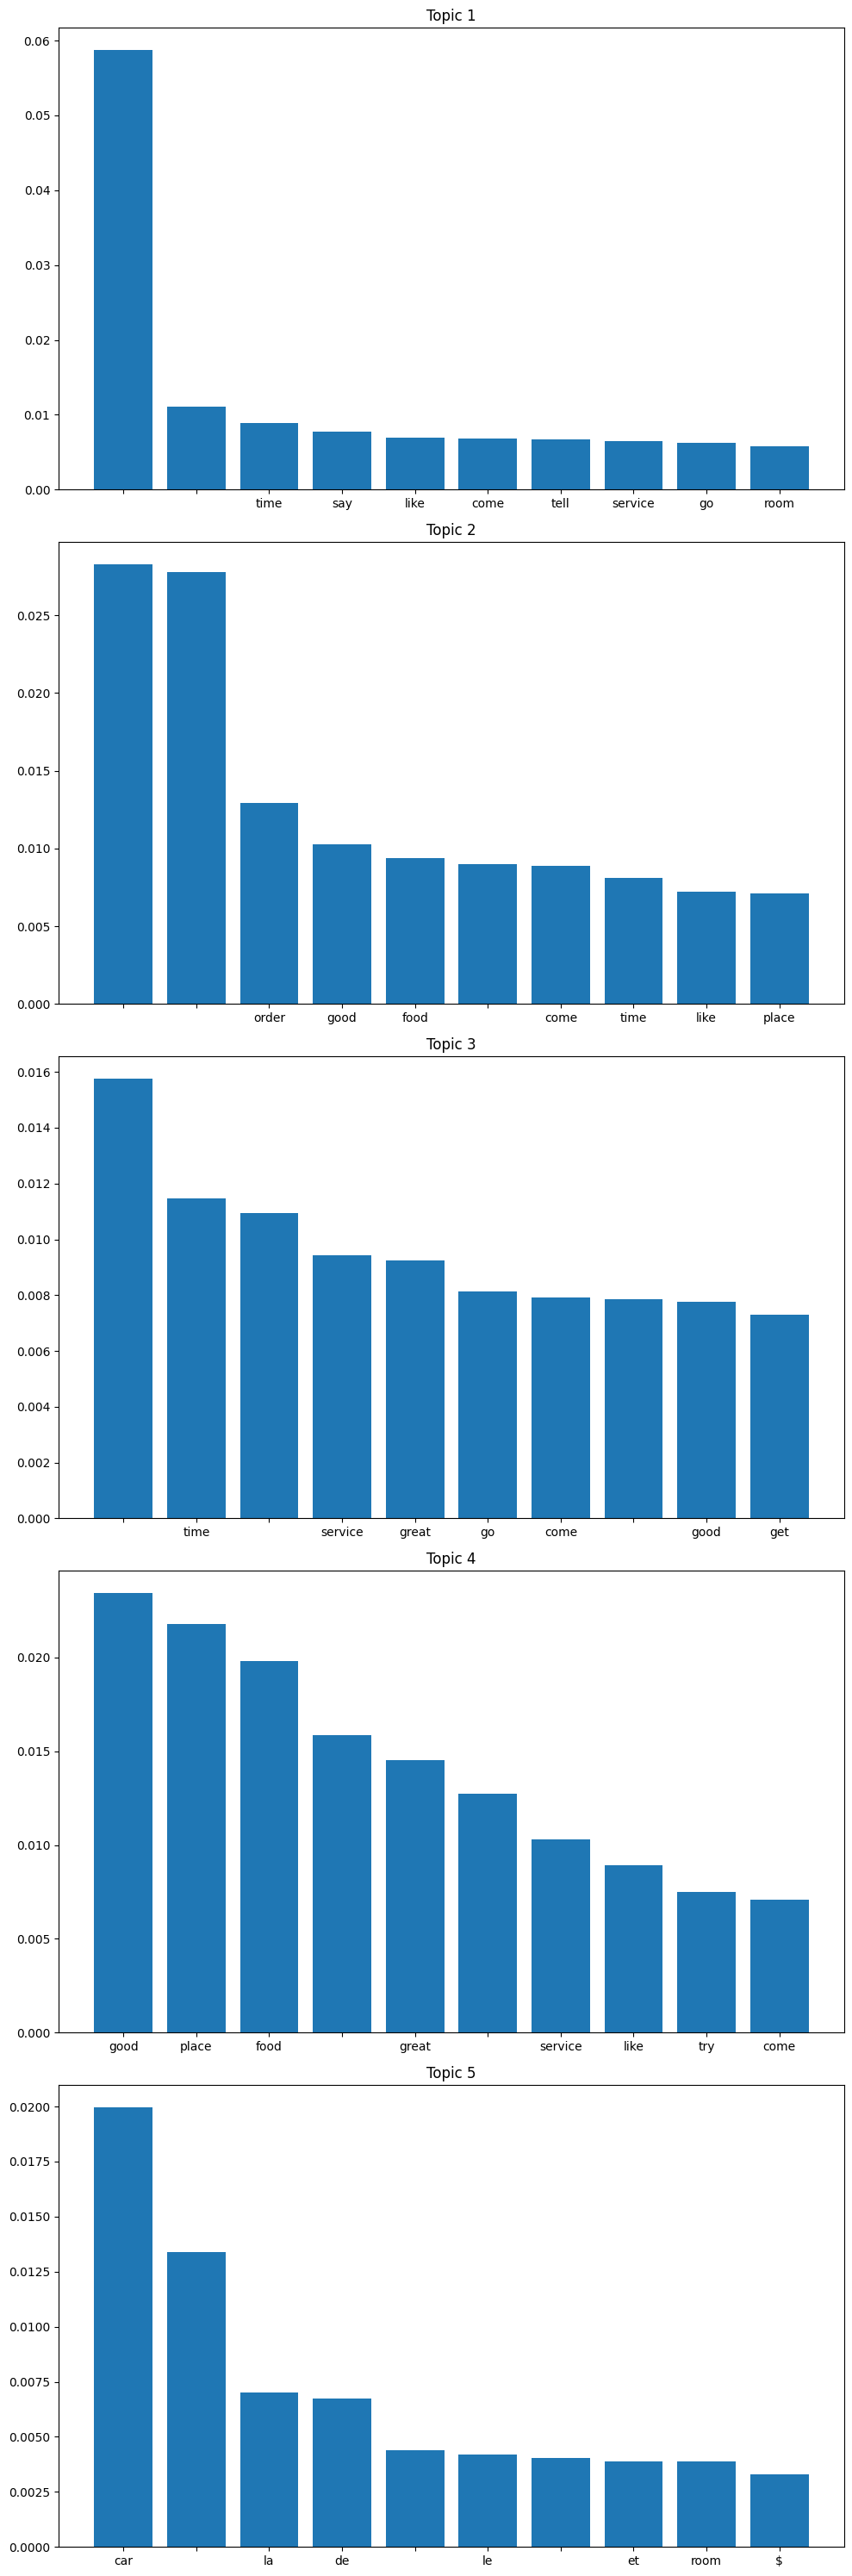

'__main__'

In [29]:
# Cell for matplotlib visualzation

class Visualization:
# Defines the number of topics
    num_topics = lda.num_topics
# Creates subplots
    fig, axs = plt.subplots(num_topics, figsize=(10, 6*num_topics))
# Iterates over topics and plot word distributions
    for topic_id in range(num_topics):
        topic_words = lda.show_topic(topic_id, topn=10)
        topic_words = dict(topic_words)
        axs[topic_id].bar(topic_words.keys(), topic_words.values())
        axs[topic_id].set_title(f'Topic {topic_id+1}')
# Adjusts spacing between subplots
    plt.tight_layout()
    plt.show()
# Assigns the visualization to a variable
VisualPlot = Visualization
VisualPlot.__module__
